In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("updated_pollution_dataset.csv")

In [ ]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [ ]:
df=df.rename(columns={"Air Quality":"Air_Quality"})

In [ ]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
df.isna().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air_Quality,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
le = LabelEncoder()
df["Air_Quality"] = le.fit_transform(df["Air_Quality"])

In [ ]:
df['Air_Quality'].value_counts()

,count
Air_Quality,
0,2000
2,1500
3,1000
1,500


In [ ]:
df.shape

(5000, 10)

In [ ]:
df.dtypes

,0
Temperature,float64
Humidity,float64
PM2.5,float64
PM10,float64
NO2,float64
SO2,float64
CO,float64
Proximity_to_Industrial_Areas,float64
Population_Density,int64
Air_Quality,int64


In [ ]:
X = df.drop("Air_Quality", axis=1)
y = df["Air_Quality"]

In [ ]:
X[:5]

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303


In [ ]:
y[:5]

,Air_Quality
0,2
1,2
2,2
3,0
4,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
4227,38.8,92.5,8.3,29.0,32.8,8.3,2.19,3.9,698
4676,26.3,54.1,0.9,10.3,25.1,4.5,0.95,10.1,316
800,37.2,111.3,0.2,8.8,31.9,18.5,2.12,7.7,753
3671,17.5,57.2,8.7,13.6,25.6,3.1,1.03,11.6,505
4193,26.7,54.8,5.8,11.3,15.8,4.5,1.25,11.8,565
...,...,...,...,...,...,...,...,...,...
4426,30.0,59.7,59.3,68.8,22.1,7.4,1.39,5.1,412
466,27.7,54.0,17.6,23.2,24.6,11.1,1.27,7.8,638
3092,24.2,67.6,19.4,35.1,24.2,9.6,1.91,6.2,422
3772,21.4,76.4,15.3,22.1,12.4,3.4,0.96,16.3,420


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[:5]

array([[ 1.29711117,  1.41204699, -0.48178234, -0.05266199,  0.72126828,
        -0.25542792,  1.27823849, -1.25468399,  1.30618379],
       [-0.55649265, -1.00679356, -0.77737332, -0.72482035, -0.1473457 ,
        -0.82511105, -1.01424265,  0.45834605, -1.19352042],
       [ 1.05984988,  2.59627101, -0.80533463, -0.7787368 ,  0.61974197,
         1.27372152,  1.14882423, -0.20476235,  1.66608885],
       [-1.86142973, -0.81152258, -0.46580445, -0.60620417, -0.09094219,
        -1.03499431, -0.86634064,  0.87278881,  0.04324423],
       [-0.49717732, -0.96270011, -0.58164416, -0.68887606, -1.19645088,
        -0.82511105, -0.45961011,  0.92804784,  0.43586793]])

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
naive_pred = naive_bayes.predict(X_test)

<Axes: >

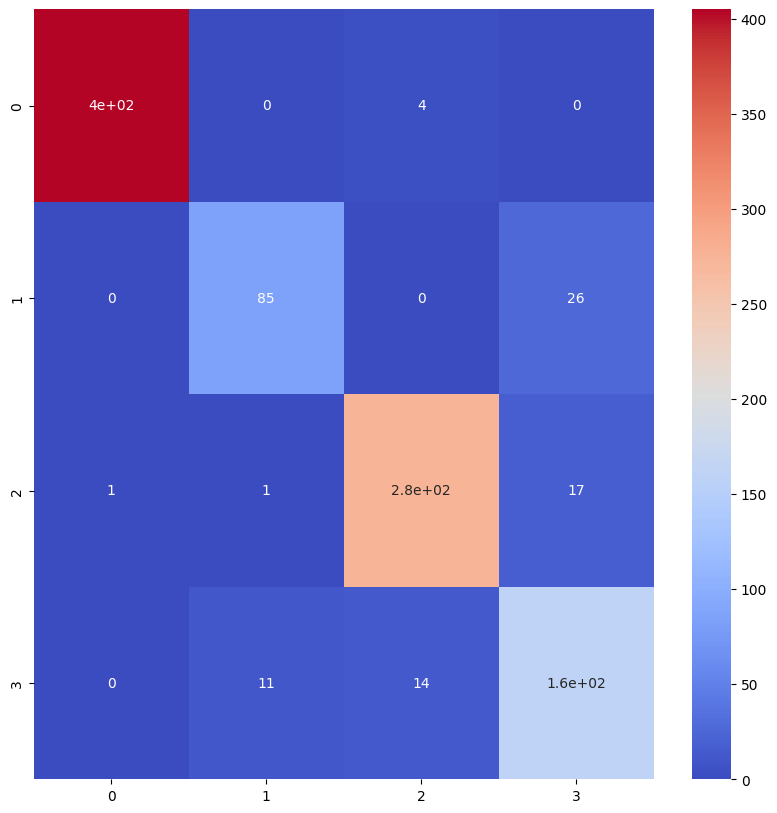

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
y_test = le.fit_transform(y_test)
naive_pred = le.inverse_transform(y_pred)
plt.figure(figsize=(10,10))
cm_naive = confusion_matrix(y_test, naive_pred)
sns.heatmap(cm_naive,annot=True,cmap="coolwarm")

In [ ]:
from sklearn.metrics import accuracy_score
naive_acc=accuracy_score(y_test, naive_pred)

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log_pred = logistic_regression.predict(X_test)

<Axes: >

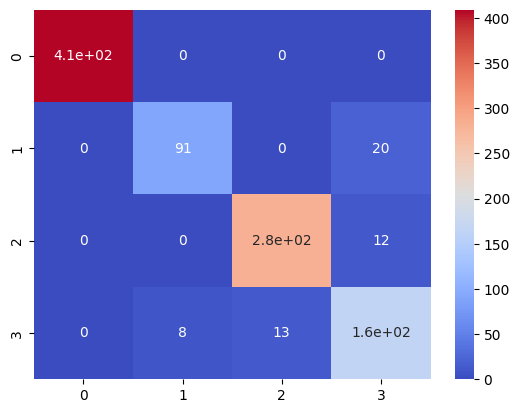

In [ ]:
cm_log = confusion_matrix(y_test, log_pred)
sns.heatmap(cm_log,annot=True,cmap="coolwarm")

In [ ]:
log_acc=accuracy_score(y_test, log_pred)

In [ ]:
df_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes"],
    "Accuracy": [log_acc, naive_acc]
})

In [ ]:
df_results

,Model,Accuracy
0,Logistic Regression,0.947
1,Naive Bayes,0.926
